<a href="https://colab.research.google.com/github/peponou/DiningCryptographers/blob/master/DiningCryptographers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Information Flow of Dining Cryptographers

Στο notebook αυτό αναλύεται το μοντέλο ανώνυμης επικοινωνίας Dining Cryptographers, μέσω της θεωρίας του Quantitative Information Flow. Για την ανάλυση του μοντέλου και την εξαγωγή συμπερασμάτων για την ιδιωτικότητα που προσφέρει, λαμβάνονται υπόψιν διαφορετικές παραμετροποιήσεις του συστήματος. 

Το μοντέλο Dining Cryptographers εφαρμόζεται όταν ένας χρήστης ενός δικτύου με Ν χρήστες θέλει να στείλει ένα μήνυμα **χωρίς να αποκαλυφθεί η ταυτότητά του.** Η λογική είναι η ακόλουθη: 

Έχουμε N χρήστες που συμμετέχουν σε ένα δίκτυο - N κόμβους στον γράφο.
Αυτοί μπορεί να συνδέονται μεταξύ τους με οποιονδήποτε συνδυασμό (π.χ. ο 1ος συνδέεται με τον 2ο αλλά όχι με τον 3ο) που φαίνεται από τις ακμές στον γράφο.
**Οι χρήστες που συνδέονται, ρίχνουν ένα νόμισμα**. Αυτό έρχεται 0 *(κορώνα)* με πιθανότητα $p$ και 1 *(γράμματα)* με πιθανότητα $(1-p)$.
Αφού ρίξουν όλοι νομίσματα, **ο καθένας αθροίζει (XOR) τα νομίσματά του και ανακοινώνει το αποτέλεσμα** (0 ή 1). Π.χ. αν ο χρήστης 1 συνδέεται με τους 2, 3, 4 και τα νομίσματα είναι αντίστοιχα 0,1,1 ανακοινώνει 0+1+1 = 0.
Ένας από τους χρήστες είναι **αυτός που θέλει να στείλει το μήνυμα** (1 bit). Αυτός **ανακοινώνει το αντίθετο** απ' ό,τι υπολόγισε. Αν δηλαδή ο χρήστης που πληρώνει είναι ο 1 (ίδιος με πριν) αντί να πει 0 θα πει 1.

Για τη μοντελοποίηση του συστήματος Dining Cryptographers, κατασκευάζεται κανάλι $C$ ως εξής:

> **Είσοδος**: ο κρυπτογράφος που πληρώνει (0,1,.., Ν)

> **Έξοδος** : οι ανακοινώσεις των κρυπτογράφων και το coin observation σε περίπτωση που έχουμε corrupted χρήστη

Για παράδειγμα, '100', '1' σημαίνει ότι ο πρώτος ανακοινώνει 1, ο δεύτερος και ο τρίτος 0 και ο corrupted βλέπει ένα νόμισμα το οποίο έχει έρθει γράμματα.  
  

In [5]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

     |████████████████████████████████| 20.9MB 90.9MB/s 


In [3]:
def show_graph_with_labels(adjacency_matrix): 
    rows, cols = np.where(adjacency_matrix != -1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=300, node_color = 'lightblue', with_labels=True)
    plt.show()

def get_pi(p, A):
    pi = [p] * len(A)
    pi = numpy.array(pi)
    pi[0] = p
    pi[1:] = (1-p)/(len(A) - 1)
    return pi

def factor(A,B):
    R = channel.factorize(B, A)
    A_round = np.round(A.dot(R),2)
    B_round = np.round(B,2)
    print("Is CR == C_new? ", np.all(A_round == B_round))
    

## Δίκαια νομίσματα

Για να εξετάσουμε σε ποιες περιπτώσεις το σύστημα είναι ισχυρά ανώνυμο, υποθέτοντας ότι όλα τα νομίσματα είναι δίκαια, θα λάβουμε υπόψιν τις ακόλουθες περιπτώσεις: 
* Α1: 0 corrupted χρήστες
* Α2: 1 corrupted χρήστης, 1 συνιστώσα τίμιων χρηστών
* Α3: 1 corrupted χρήστης, 2 συνιστώσες τίμιων χρηστών
* Α4: 2 corrupted χρήστες, 3 συνιστώσες τίμιων χρηστών

Και για τις τέσσερις περιπτώσεις θα θεωρήσουμε ότι η αρχική κατανομή είναι η **ομοιόμορφη** και **αντίπαλος είναι ο Bayes**. Επίσης, για την ανάλυση θα πάρουμε έναν τυχαίο γράφο με δεκατρείς χρήστες (μη κυκλικό και μη πλήρη), με πίνακα γειτνίασης Α:

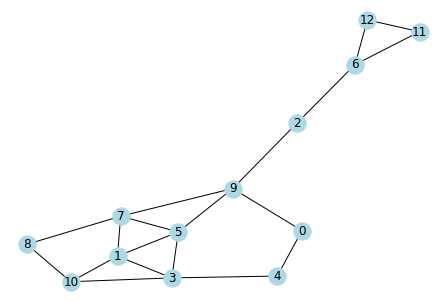

In [ ]:
pi = probab.uniform(13)

A = np.array([[-1,-1,-1,-1,0.5,-1,-1,-1,-1,0.5,-1,-1,-1],[-1,-1,-1,0.5,-1,0.5,-1,0.5,-1,-1,0.5,-1,-1],[-1,-1,-1,-1,-1,-1,0.5,-1,-1,0.5,-1,-1,-1],[-1,0.5,-1,-1,0.5,0.5,-1,-1,-1,-1,0.5,-1,-1],[0.5,-1,-1,0.5,-1,-1,-1,-1,-1,-1,-1,-1,-1],[-1,0.5,-1,0.5,-1,-1,-1,0.5,-1,0.5,-1,-1,-1],[-1,-1,0.5,-1,-1,-1,-1,-1,-1,-1,-1,0.5,0.5],[-1,0.5,-1,-1,-1,0.5,-1,-1,0.5,0.5,-1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,0.5,-1,-1,0.5,-1,-1],[0.5,-1,0.5,-1,-1,0.5,-1,0.5,-1,-1,-1,-1,-1],[-1,0.5,-1,0.5,-1,-1,-1,-1,0.5,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,0.5,-1,-1,-1,-1,-1,0.5],[-1,-1,-1,-1,-1,-1,0.5,-1,-1,-1,-1,0.5,-1]])
show_graph_with_labels(A)

**Περίπτωση 1** *(0 corrupted χρήστες)*

Το σενάριο αυτό αποτελεί την πιο απλή περίπτωση ενός Dining Cryptographers συστήματος. Στην περίπτωση αυτή αναμένουμε να έχουμε ισχυρή ανωνυμία. Εκτελούμε το πρόγραμμα channel και το κανάλι που δημιουργείται το αποθηκεύουμε στο A1_ch. 

Συγκρίνοντας το prior με το posterior vulnerability, παρατηρούμε ότι οι δύο τιμές είναι ίσες, η ευπάθεια του συστήματος, δηλαδή, δεν αυξήθηκε. Εξετάζουμε, στη συνέχεια, τη διαρροή του συστήματος. Η πολλαπλασιαστική διαρροή ισούται με 1, πράγμα που σημαίνει ότι από το σύστημα δε διαρρέει πληροφορία. Αυτό, όμως, από μόνο του δεν είναι αρκετό. Οφείλουμε να εξετάσουμε και τη **χωρητικότητα** του καναλιού. Η πολλαπλασιαστική χωρητικότητα $
\mathcal{M L}_{b}^{\times}(C)= 1$, άρα το κανάλι είναι **non-interfering**.

Επίσης, ένας ακόμη τρόπος είναι να ελέγξουμε τις γραμμές όπως έχουν προκύψει από το κανάλι. Οι γραμμές αυτές είναι όλες ίδιες αφού για κάθε παρατήρηση $y$ και μυστικά $x$, $x'$, ισχύει $p(y|x) = p(y|x')$. 

In [ ]:
A1_ch = np.array([[0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,A1_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,A1_ch))
print("Multiplicative Bayes capacity =", measure.bayes_vuln.mult_capacity(A1_ch))

Prior Bayes vulnerability = 0.07692307692307693
Posterior Bayes vulnerability = 0.07692307692307693
Multiplicative Bayes leakage = 1.0
Multiplicative Bayes capacity = 1.0


**Περίπτωση 2** *(1 corrupted χρήστης, 1 συνιστώσα τίμιων χρηστών)*

Στην περίπτωση αυτή, η θέση του corrupted χρήστη οδηγεί στη δημιουργία μίας συνιστώσας που αποτελείται από τίμιους χρήστες. Ο χρήστης που θεωρούμε corrupted είναι αυτός με τον αριθμό 12. Ο γράφος σε αυτή την περίπτωση θα είναι ο ακόλουθος.

<img src = 'https://drive.google.com/uc?export=view&id=1AZ48DWS9U8nB3k6r1iTNTG6fIjONj7w9' width = '500px'>

In [ ]:
A2_ch = np.array([[0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,A2_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,A2_ch))

Prior Bayes vulnerability = 0.07692307692307693
Posterior Bayes vulnerability = 0.15384615384615385
Multiplicative Bayes leakage = 2.0


<img src = 'https://drive.google.com/uc?export=view&id=11bGqz4C7lP7hmk2D1waWuj5dueBRau_O' width = '500px'>

Παρατηρούμε ότι η διαρροή σε αυτή την περίπτωση ισούται με 2. Αυτό σημαίνει ότι ο αντίπαλος έχει αποκτήσει κάποια γνώση σε σχέση με την αρχική του γνώση. Το σύστημα είναι πιο ευάλωτο - αυξάνεται η ευπάθεια. Ωστόσο, η συνιστώσα που προκύπτει διατηρεί ισχυρή ανωνυμία, όπως φαίνεται και στην παραπάνω εικόνα.

**Περίπτωση 3** *(1 corrupted χρήστης, 2 συνιστώσες τίμιων χρηστών)*

Στην περίπτωση αυτή θεωρούμε corrupted τον χρήστη με τον αριθμό 2. Λόγω της θέσης του corrupted, προκύπτουν δύο συνιστώσες από τίμιους χρήστες. Σύμφωνα με τη θεωρία, περιμένουμε να δούμε ισχυρή ανωνυμία σε κάθε συνεκτική συνιστώσα. Ο γράφος απεικονίζεται παρακάτω:


<img src = 'https://drive.google.com/uc?export=view&id=1s1aA7j6SIS4Lnjagsc0uG3PPxDkwbgtW' width = '500px'>

In [ ]:
A3_ch = np.array([[0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,A3_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,A3_ch))

<img src = 'https://drive.google.com/uc?export=view&id=10zOAZBHvA8s6E9_jEF5_Bw3Qs0ZslEU4' width = '500px'>

Στην παραπάνω εικόνα φαίνεται ένα τμήμα του καναλιού. Στο συγκεκριμένο απόκομμα, μπορούμε να διακρίνουμε τις δύο συνεκτικές συνιστώσες που προέκυψαν. Επίσης, είναι φανερό ότι οι πιθανότητες είναι ίσες σε κάθε μία από αυτές, πράγμα που επιβεβαιώνει την **ισχυρή ανωνυμία σε κάθε συνεκτική συνιστώσα**. Ωστόσο, η διαρροή έχει αυξηθεί, όπως είναι αναμενόμενο, διότι τώρα σε σχέση με την prior κατανμομή ο αντίπαλος γνωρίζει περισσότερα.

**Περίπτωση 4** *(2 corrupted χρήστες, 3 συνιστώσες τίμιων χρηστών)*

Στην περίπτωση αυτή θεωρούμε δύο corrupted χρήστες, τους 6 και 9. Λόγω της θέσης των corrupted χρηστών, προκύπτουν τρεις συνιστώσες τίμιων χρηστών. Αξίζει να σημειωθεί ότι η μία από τις τρεις συνιστώσες αποτελείται από έναν και μόνο χρήστη. Ο γράφος είναι:

<img src = 'https://drive.google.com/uc?export=view&id=1uatYgmcQPurUOvj8ftpHHhrVx-j7F6PH' width = '300px'>

*Επειδή σε αυτήν την περίπτωση το κανάλι έιναι πολύ μεγάλο (11 rows x 98304 columns), θα αποθηκεύσουμε τα αποτελέσματα από την εκτέλεση του προγράμματος σε ένα A4_output.txt, το οποίο είναι:*


In [4]:
with open('/content/drive/My Drive/A4_output_measures.txt', 'r') as f: 
    print(f.read())

Prior Bayes vulnerability = 0.07692307692307693
Posterior Bayes vulnerability = 0.38461538461538464
Multiplicative Bayes leakage = 5.0



Παρατηρείται επιπλέον αύξηση της διαρροής σε σχέση με τις προηγούμενες περιπτώσεις. Μπορούμε να διακρίνουμε τις τρεις συνιστώσες που προέκυψαν και το γεγονός ότι οι πιθανότητες είναι ίσες σε κάθε μία από αυτές. Αξίζει να τονιστεί ότι στην περίπτωση που ο **απομονωμένος χρήστης** - με τον αριθμό 2 - είναι ο αποστολέας, η **ανωνυμία** είναι **μηδενική**, ενώ σε αντίθετη περίπτωση η ισχυρή ανωνυμία διατηρείται.


<img src='https://drive.google.com/uc?export=view&id=1Mla3TlEmK8ApgiCdb1svgVttrDUZou-9' width='700px'> 

Συνοψίζοντας τα παραπάνω καταλήγουμε ότι έχουμε ισχυρή ανωνυμία, όταν ο γράφος παραμένει συνεκτικός. Όταν ο γράφος σπάει σε συνιστώσες, η ανωνυμία εξασφαλίζεται μέσα σε κάθε μία από αυτές. Εξαίρεση στο παραπάνω συμπέρασμα αποτελεί η περίπτωση που η προκύπτουσα συνιστώσα αποτελείται από έναν και μόνο κόμβο, όπου η ανωνυμία καταλύεται για τη συνιστώσα αυτή.

In [ ]:
df = pd.DataFrame([(0.076923, 1.0),(0.153846, 2.0),(0.230769, 3.0),(0.384615, 5.0)], 
                  index = ["Α1", "Α2", "Α3", "Α4"], 
                  columns = ('Posterior Bayes vulnerability','Multiplicative Bayes leakage'))
df

Posterior Bayes vulnerability  Multiplicative Bayes leakage
Α1                       0.076923                           1.0
Α2                       0.153846                           2.0
Α3                       0.230769                           3.0
Α4                       0.384615                           5.0

## Μη δίκαια νομίσματα

Έστω  $G_{t}$ το spanning tree του γράφου $G_{f}$, το οποίο αποτελείται από δίκαια νομίσματα και $C_{t}$, $C_{f}$ τα αντίστοιχα κανάλια. 

Αφού το $G_{t}$ είναι **συνεκτικό** και όλα τα νομίσματα είναι τίμια, το  σύστημα $S(G_{t})$ είναι ισχυρά ανώνυμο.

Δηλαδή,
$$\mathcal{M L}_{g}(C_{t})=0 .$$

Προσθέτοντας ακμές στο  $G_{t}$, κατασκευάζουμε το  $G_{f}$.

Για την χωρητικότητα του καναλιού ισχύει *(αποδεικνύεται στο τέταρτο ερώτημα*):

$$\mathcal{M L}_{g}(C_{f}) \leq \mathcal{M L}_{g}(C_{t}) = 0 .$$

Άρα, το $G_{f}$ είναι επίσης ισχυρά ανώνυμο.

Ακολουθεί ένα παράδειγμα για την παραπάνω απόδειξη. Αρχικά, θα κατασκευαστεί γράφος με 6 κόμβους, 5 ακμές και όλα τα νομίσματα δίκαια. Αυτός θα αποτελεί το spanning tree του επόμενου γράφου (*Περίπτωση Β1*). Στη συνέχεια, θα κατασκευαστεί γράφος που θα προκύπτει από την προσθήκη ακμών στο spanning tree. Τα νομίσματα των νέων ακμών θα είναι μη δίκαια με τυχαία πιθανότητα (*Περίπτωση Β2*). Τέλος, η τρίτη περίπτωση που παρουσιάζεται είναι το κανάλι που προκύπτει από την αντικατάσταση ενός τίμιου χρήστη με αριθμό 1 με έναν corrupted (*Περίπτωση Β3*). 
Και για τις τρεις αυτές περιπτώσεις θα θεωρήσουμε ότι η αρχική κατανομή είναι η **ομοιόμορφη** και **αντίπαλος είναι ο Bayes**. 

**Περίπτωση 1** 

Αφού κατασκευάσουμε το κανάλι, ελέγχουμε τα prior και posterior vulnerabilities, τη διαρροή καθώς και τη χωρητικότητα. Όπως είναι αναμενόμενο, το σύστημα δε διαρρέει πληροφορία, είναι δηλαδή ΝΙ.


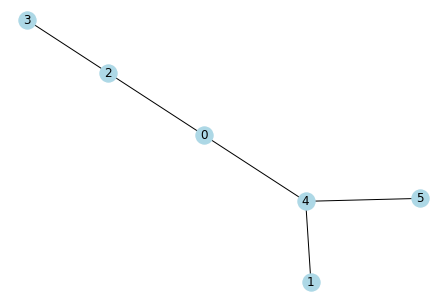

Prior Bayes vulnerability = 0.16666666666666666
Posterior Bayes vulnerability = 0.16666666666666666
Multiplicative Bayes leakage = 1.0
Multiplicative Bayes capacity = 1.0


In [ ]:
B_1 = np.array([[-1,-1,0.5,-1,0.5,-1],[-1,-1,-1,-1,0.5,-1],[0.5,-1,-1,0.5,-1,-1],[-1,-1,0.5,-1,-1,-1],[0.5,0.5,-1,-1,-1,0.5],[-1,-1,-1,-1,0.5,-1]])
show_graph_with_labels(B_1)
B_1_ch = np.array([[0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125]])
pi = probab.uniform(6)
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,B_1_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,B_1_ch))
print("Multiplicative Bayes capacity =", measure.bayes_vuln.mult_capacity(B_1_ch))

**Περίπτωση 2** 

Ο γράφος που εξετάζουμε, στην περίπτωση αυτή, προκύπτει από την προσθήκη τριών ακμών με νομίσματα μη δίκαια. Οι πιθανότητες να έρθει κορώνα στα τρία αυτά νομίσματα είναι 0.9, 0.4 και 0.3. Εξετάζοντας τις ίδιες μετρικές με πριν, παρατηρούμε ότι, πράγματι, η ανωνυμία παραμένει ισχυρή.

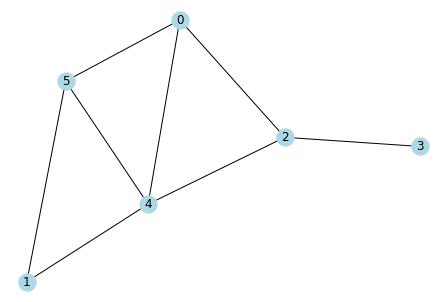

Prior Bayes vulnerability = 0.16666666666666666
Posterior Bayes vulnerability = 0.16666666666666666
Multiplicative Bayes leakage = 1.0
Multiplicative Bayes capacity = 1.0


In [ ]:
B_2 = np.array([[-1,-1,0.5,-1,0.5,0.9],[-1,-1,-1,-1,0.4,0.5],[0.5,-1,-1,0.5,0.3,-1],[-1,-1,0.5,-1,-1,-1],[0.5,0.4,0.3,-1,-1,0.5],[0.9,0.5,-1,-1,0.5,-1]])
show_graph_with_labels(B_2)
B_2_ch = np.array([[0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125], [0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,B_2_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,B_2_ch))
print("Multiplicative Bayes capacity =", measure.bayes_vuln.mult_capacity(B_2_ch))

**Περίπτωση 3** 

Στην περίπτωση αυτή, αντικαθιστούμε τον χρήστη με αριθμό 1 με έναν corrupted. Η διαρροή αλλάζει και η γνώση του αντιπάλου διπλασιάζεται σε σχέση με την αρχική του γνώση. Παρ' όλα αυτά, η ανωνυμία παραμένει ισχυρή μέσα στη συνιστώσα ακόμα και αν υπάρχουν δύο μη τίμια νομίσματα.


In [ ]:
B_3_ch = np.array([[0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0], [0.012499999999999999, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.0, 0.0, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.01875, 0.0, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.0, 0.0, 0.0, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.012499999999999999, 0.0, 0.012499999999999999, 0.01875, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.01875, 0.01875, 0.01875, 0.0, 0.0, 0.0, 0.0, 0.01875, 0.0]])
print("Prior Bayes vulnerability =", measure.bayes_vuln.prior(pi))
print("Posterior Bayes vulnerability =", measure.bayes_vuln.posterior(pi,B_3_ch))
print("Multiplicative Bayes leakage =", measure.bayes_vuln.mult_leakage(pi,B_3_ch))

Prior Bayes vulnerability = 0.16666666666666666
Posterior Bayes vulnerability = 0.3333333333333333
Multiplicative Bayes leakage = 2.0


<img src = 'https://drive.google.com/uc?export=view&id=1go0HV9vBAMxuJujAxsWQduqQIa4Nt5Ly' width = '500px'>

Βλέπουμε, λοιπόν, ότι στις περιπτώσεις που τηρείται η συνθήκη που αποδείχτηκε παραπάνω (spanning tree με δίκαια νομίσματα), τότε έχουμε ισχυρή ανωνυμία ακόμα και όταν στο τελικό σύστημα έχουμε μη δίκαια νομίσματα.

## Μηδενική διαρροή

Αν το κανάλι είναι Non-Interfering, έχουμε μηδενική διαρροή. 

**Non-Interfering:** 
$$p(y|x) = p(y|x') , $$
<br>
για κάθε παρατήρηση $y$ και μυστικά $x, x'$.

<br> Δηλαδή:
$$p(y|x) = p(y|x')$$
$$\Leftrightarrow$$
$$p(x,y) = p(x)p(y)$$
$$\Leftrightarrow$$
$$π = σ^{y}$$  
Όμως, για το $V[π,C]$ έχουμε:
<br><br>
$$V[π,C]= \sum_{y}δ_{y}V(σ^{y}) =\sum_{y}\sum_{x}p(x,y)V(π) =\sum_{y}\sum_{x}p(x)p(y)V(π) = V(π)$$
<br>
Υπολογίζοντας τηv αθροιστική διαρροή, παίρνουμε:
$$\left.\mathcal{L}^{+}(\pi, C)=V{[\pi}, C\right]-V(\pi) = 0$$
<br>
Ενώ η πολλαπλασιαστική διαρροή, είναι:
$$\mathcal{L}^{\times}(\pi, C)=\frac{V(\pi)}{V[\pi,C]} = 1$$






Το **αντίθετο** όμως **δεν ισχύει**! Αν, δηλαδή, έχουμε μηδενική διαρροή **δε** σημαίνει ότι το κανάλι είναι Non-Interfering. Θα δούμε παρακάτω ότι είναι δυνατό να έχουμε μηδενική διαρροή ενώ το σύστημά μας δεν είναι ισχυρά ανώνυμο.

Για το ερώτημα αυτό θα υπολογίσουμε την διαρροή για συνδυασμούς  νομισμάτων, corrupted χρηστών και prior κατανομών. 
 

* C1: 2 corrupted χρήστες, δίκαια νομίσματα
* C2: 0 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια 
* C3: 2 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια
* C4: 0 corrupted χρήστες, μη δίκαια νομίσματα όχι ίδια
* C5: 2 corrupted χρήστες, μη δίκαια νομίσματα όχι ίδια

Και για τις πέντε περιπτώσεις θα πάρουμε τον ίδιο τυχαίο γράφο με επτά χρήστες (μη κυκλικό και μη πλήρη).


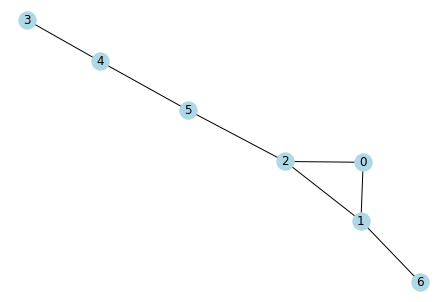

In [ ]:
C_unbiased = np.array([[-1,0.5,0.5,-1,-1,-1,-1], [0.5,-1,0.5,-1,-1,-1,0.5],[0.5,0.5,-1,-1,-1,0.5,-1],[-1,-1,-1,-1,0.5,-1,-1],[-1,-1,-1,0.5,-1,0.5,-1],[-1,-1,0.5,-1,0.5,-1,-1],[-1,0.5,-1,-1,-1,-1,-1]])
C_same_biased = np.array([[-1,0.7,0.7,-1,-1,-1,-1],[0.7,-1,0.7,-1,-1,-1,0.7],[0.7,0.7,-1,-1,-1,0.7,-1],[-1,-1,-1,-1,0.7,-1,-1],[-1,-1,-1,0.7,-1,0.7,-1],[-1,-1,0.7,-1,0.7,-1,-1],[-1,0.7,-1,-1,-1,-1,-1]])
C_different_biased = np.array([[-1,0.4,0.3,-1,-1,-1,-1],[0.4,-1,0.6,-1,-1,-1,0.5],[0.3,0.6,-1,-1,-1,0.2,-1],[-1,-1,-1,-1,0.4,-1,-1],[-1,-1,-1,0.4,-1,0.8,-1],[-1,-1,0.2,-1,0.8,-1,-1],[-1,0.5,-1,-1,-1,-1,-1]])
show_graph_with_labels(C_unbiased)

Για κάθε μία από τις πέντε περιπτώσεις που εξετάζονται, κατασκευάζεται το αντίστοιχο κανάλι. Στη συνέχεια, δημιουργείται ένα γράφημα που δείχνει την πολλαπλασιαστική Bayes διαρροή για διαφορετικές prior γνώσεις, για κάθε μία από τις πέντες αυτές περιπτώσεις. Υποθέτουμε ότι ο **χρήστης 0 έχει πιθανότητα $p$** να στείλει το μήνυμα και **οι υπόλοιποι χρήστες μοιράζονται το υπόλοιπο $1 − p.$** Επιπλέον, σχεδιάζεται το αντίστοιχο γράφημα για το $g$-leakage, για έναν αντίπαλο με συνάρτηση κέρδους $g$ η οποία παράγεται με τυχαίο τρόπο.

In [ ]:
C1_ch = np.array([[0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
C2_ch = np.array([[0.08883699999999997, 0.05042099999999999, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.006993000000000001], [0.05042099999999999, 0.08883699999999997, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.003969000000000002], [0.05042099999999999, 0.05042099999999999, 0.08883699999999997, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.006993000000000001, 0.003969000000000002, 0.003969000000000002], [0.003969000000000002, 0.003969000000000002, 0.006993000000000001, 0.08883699999999997, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.003969000000000002, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.009261000000000002, 0.009261000000000002], [0.009261000000000002, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.006993000000000001, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.021609, 0.038072999999999996, 0.016317, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.038072999999999996, 0.021609, 0.009261000000000002, 0.016317, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.009261000000000002, 0.009261000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.003969000000000002], [0.021609, 0.021609, 0.038072999999999996, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.016317, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.003969000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.003969000000000002, 0.0017010000000000011, 0.003969000000000002, 0.021609, 0.003969000000000002, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.006993000000000001, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.009261000000000002], [0.021609, 0.038072999999999996, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.08883699999999997, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.05042099999999999, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.016317, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.003969000000000002, 0.038072999999999996, 0.016317, 0.038072999999999996, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.021609, 0.003969000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.003969000000000002, 0.021609, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.006993000000000001, 0.021609, 0.009261000000000002, 0.021609, 0.009261000000000002, 0.016316999999999998, 0.009261000000000002]])
C3_ch = np.array([[0.08235429999999996, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.03529469999999999, 0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.08235429999999996, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.03529469999999999, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0027783000000000013, 0.015126299999999999, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0005103000000000004, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235429999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027783000000000013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015126299999999999, 0.03529469999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006482700000000001, 0.0, 0.015126299999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.0, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.0, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002778300000000001, 0.006482700000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011907000000000007, 0.002778300000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005103000000000004, 0.0011907000000000007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021870000000000022, 0.0005103000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
C4_ch = np.array([[0.007680000000000001, 0.007040000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.009600000000000001, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.0576, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.04224, 0.04608], [0.007040000000000001, 0.007680000000000001, 0.009600000000000001, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.0576, 0.04608, 0.04224], [0.007680000000000001, 0.009600000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.007040000000000001, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.04224, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.0576, 0.04608], [0.011519999999999997, 0.014399999999999996, 0.011519999999999997, 0.007680000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.010559999999999996, 0.007040000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.007680000000000001, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.04608, 0.01056, 0.002639999999999999, 0.009600000000000001, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.0576, 0.01152, 0.0028799999999999993, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.04608, 0.0144, 0.003599999999999999, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.0576, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.04224, 0.01152, 0.0028799999999999993, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.04608, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04224, 0.0017599999999999996, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.04608, 0.0019199999999999998, 0.0023999999999999994, 0.0019199999999999998], [0.007679999999999999, 0.009599999999999997, 0.007679999999999999, 0.01152, 0.007680000000000001, 0.0019199999999999998, 0.009599999999999997, 0.0070399999999999985, 0.01056, 0.007040000000000001, 0.0017599999999999996, 0.007679999999999999, 0.01152, 0.007680000000000001, 0.0019199999999999998, 0.0070399999999999985, 0.011519999999999997, 0.04608, 0.01056, 0.030720000000000004, 0.007040000000000001, 0.0017599999999999996, 0.0144, 0.009600000000000001, 0.0023999999999999994, 0.007679999999999999, 0.014399999999999996, 0.0576, 0.01152, 0.038400000000000004, 0.007680000000000001, 0.0019199999999999998, 0.011519999999999997, 0.04608, 0.0144, 0.030720000000000004, 0.009600000000000001, 0.0023999999999999994, 0.0028799999999999993, 0.014399999999999996, 0.0576, 0.038400000000000004, 0.010559999999999996, 0.04224, 0.01152, 0.028160000000000004, 0.007680000000000001, 0.0019199999999999998, 0.002639999999999999, 0.011519999999999997, 0.04608, 0.030720000000000004, 0.0028799999999999993, 0.010559999999999996, 0.04224, 0.028160000000000004, 0.002639999999999999, 0.003599999999999999, 0.011519999999999997, 0.04608, 0.030720000000000004, 0.0028799999999999993, 0.003599999999999999, 0.0028799999999999993], [0.030720000000000004, 0.038400000000000004, 0.030720000000000004, 0.0028799999999999993, 0.0019199999999999998, 0.007680000000000001, 0.038400000000000004, 0.028160000000000004, 0.002639999999999999, 0.0017599999999999996, 0.007040000000000001, 0.030720000000000004, 0.0028799999999999993, 0.0019199999999999998, 0.007680000000000001, 0.028160000000000004, 0.04608, 0.011519999999999997, 0.002639999999999999, 0.007679999999999999, 0.0017599999999999996, 0.007040000000000001, 0.003599999999999999, 0.0023999999999999994, 0.009600000000000001, 0.030720000000000004, 0.0576, 0.014399999999999996, 0.0028799999999999993, 0.009599999999999997, 0.0019199999999999998, 0.007680000000000001, 0.04608, 0.011519999999999997, 0.003599999999999999, 0.007679999999999999, 0.0023999999999999994, 0.009600000000000001, 0.01152, 0.0576, 0.014399999999999996, 0.009599999999999997, 0.04224, 0.010559999999999996, 0.0028799999999999993, 0.0070399999999999985, 0.0019199999999999998, 0.007680000000000001, 0.01056, 0.04608, 0.011519999999999997, 0.007679999999999999, 0.01152, 0.04224, 0.010559999999999996, 0.0070399999999999985, 0.01056, 0.0144, 0.04608, 0.011519999999999997, 0.007679999999999999, 0.01152, 0.0144, 0.01152], [0.007040000000000001, 0.007680000000000001, 0.009600000000000001, 0.014399999999999996, 0.009599999999999997, 0.038400000000000004, 0.007680000000000001, 0.007680000000000001, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.007040000000000001, 0.010559999999999996, 0.0070399999999999985, 0.028160000000000004, 0.007680000000000001, 0.01056, 0.002639999999999999, 0.011519999999999997, 0.0017599999999999996, 0.007679999999999999, 0.030720000000000004, 0.011519999999999997, 0.007679999999999999, 0.030720000000000004, 0.009600000000000001, 0.01152, 0.0028799999999999993, 0.014399999999999996, 0.0019199999999999998, 0.009599999999999997, 0.038400000000000004, 0.0144, 0.003599999999999999, 0.011519999999999997, 0.0023999999999999994, 0.007679999999999999, 0.030720000000000004, 0.0576, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.01152, 0.0028799999999999993, 0.010559999999999996, 0.0019199999999999998, 0.0070399999999999985, 0.028160000000000004, 0.04608, 0.01056, 0.002639999999999999, 0.0017599999999999996, 0.04224, 0.01152, 0.0028799999999999993, 0.0019199999999999998, 0.04608, 0.04608, 0.0144, 0.003599999999999999, 0.0023999999999999994, 0.0576, 0.04608, 0.04224]])
C5_ch = np.array([[0.002304, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.005376000000000001, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.002304, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0005759999999999999, 0.008063999999999997, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0034560000000000003, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.002015999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.0008639999999999999, 0.005375999999999999, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0034560000000000003, 0.021504000000000002, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005184000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035840000000000004, 0.0, 0.0015360000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053760000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034560000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048384, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020736000000000004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006144000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014336000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021504000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013824000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002015999999999999, 0.0, 0.0013439999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012959999999999998, 0.0, 0.0008639999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030239999999999993, 0.0, 0.0020159999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013439999999999995, 0.0, 0.0008959999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005759999999999999, 0.0, 0.00038399999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020159999999999996, 0.0, 0.001344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008639999999999999, 0.0, 0.0005759999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.0, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.0, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.0, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999997, 0.005375999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012095999999999997, 0.008063999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005183999999999999, 0.0034559999999999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023039999999999996, 0.0015359999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005375999999999998, 0.0035839999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034559999999999994, 0.0023039999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008063999999999998, 0.005376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

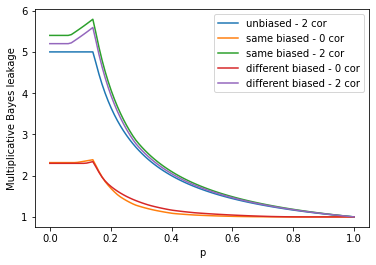

In [ ]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_unbiased), C1_ch) for p in ps], label="unbiased - 2 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_same_biased), C2_ch) for p in ps], label="same biased - 0 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_same_biased), C3_ch) for p in ps], label="same biased - 2 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_different_biased), C4_ch) for p in ps], label="different biased - 0 cor")
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_pi(p, C_different_biased), C5_ch) for p in ps], label="different biased - 2 cor")
plt.xlabel('p')
plt.ylabel('Multiplicative Bayes leakage')
plt.legend()

Στο παραπάνω γράφημα παρατηρούμε ότι στην περίπτωση που έχουμε corrupted χρήστες, η διαρροή τείνει προς το ένα (μηδενική διαρροή) όσο περισσότερο **biased** είναι η **prior γνώση** μας. Αν, για παράδειγμα, στην ακραία περίπτωση που ο αντίπαλος γνωρίζει με μεγάλη βεβαιότητα ($p\simeq 0,99$) αυτόν που πληρώνει, τότε η επιπλέον γνώση που θα αποκτήσει από το κανάλι είναι σχεδόν μηδενική.

Στην περίπτωση που δεν έχουμε corrupted χρήστες, η διαρροή τείνει προς το ένα ακόμη και όταν έχουμε μικρότερη βεβαιότητα για το ποιος πληρώνει.

Αξίζει να σημειωθεί ότι για $p\simeq 0,14$ (ομοιόμορφη κατανομή), παρατηρείται ένα peak σε κάθε καμπύλη. Η παρατήρηση αυτή συμφωνεί με τη θεωρία, η οποία λέει ότι η ομοιόμορφη κατανομή για τον Bayes αντίπαλο δίνει τη μεγαλύτερη διαρροή.

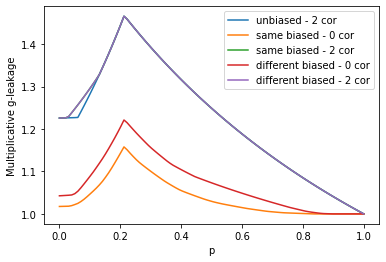

In [ ]:
G = np.random.rand(8,7)    # A random gain function with 8 actions and 7 secrets
plt.plot(ps, [measure.g_vuln.mult_leakage(G,get_pi(p, C_unbiased), C1_ch) for p in ps], label="unbiased - 2 cor")
plt.plot(ps, [measure.g_vuln.mult_leakage(G,get_pi(p, C_same_biased), C2_ch) for p in ps], label="same biased - 0 cor")
plt.plot(ps, [measure.g_vuln.mult_leakage(G,get_pi(p, C_same_biased), C3_ch) for p in ps], label="same biased - 2 cor")
plt.plot(ps, [measure.g_vuln.mult_leakage(G,get_pi(p, C_different_biased), C4_ch) for p in ps], label="different biased - 0 cor")
plt.plot(ps, [measure.g_vuln.mult_leakage(G,get_pi(p, C_different_biased), C5_ch) for p in ps], label="different biased - 2 cor")
plt.xlabel('p')
plt.ylabel('Multiplicative g-leakage')
plt.legend()

Παρατηρούμε ότι τα παραπάνω επαληθεύονται ακόμα και με την επιλογή μιας τυχαίας συνάρτησης κέρδους.

## Προσθήκη ακμών


Έστω ο γράφος $G^{n}$ και $G^{n+1}$ ο γράφος που παράγεται μετά την προσθήκη μιας ακμής. Έστω ότι $C^{n}$ και $C^{n+1}$ τα κανάλια που αντιστοιχούν στους γράφους αυτούς.

Ο αναδρομικός τύπος είναι:

$$C^{n+1} = pC^{n}+(1-p)C^{\prime},$$

όπου ο $C^{\prime}$ προκύπτει από μετάθεση των στηλών του $C^{n}$.

Για τη χωρητικότητα του καναλιού $C^{\prime}$ ισχύει:

$$\mathcal{M L}_{g}(C^{n}) = \mathcal{M L}_{g}(C^{\prime}) $$

Άρα:

$$
\mathcal{M L}_{g}(C^{n+1}) = \mathcal{M L}_{g}(pC^{n}+(1-p)C^{\prime}) 
$$

Από την κυρτότητα της χωρητικότητας, ισχύει:

$$
\mathcal{M L}_{g}(C^{n+1})\leq p \mathcal{M L}_{g}(C^{n})+(1-p) \mathcal{M L}_{g}(C^{\prime})
$$

$$
= p \mathcal{M L}_{g}(C^{n})+(1-p) \mathcal{M L}_{g}(C^{n})
$$

$$=\mathcal{M L}_{g}(C^{n}) $$

Αποδεικνύεται, δηλαδή, ότι:

$$\mathcal{M L}_{g}(C^{n+1}) \leq \mathcal{M L}_{g}(C^{n}) $$

Για να συγκρίνουμε δύο συστήματα, επομένως, ένας τρόπος είναι να συγκρίνουμε τις χωρητικότητές τους. Αυτός ο τρόπος σύγκρισης μπορεί να μας οδηγήσει σε  συμπεράσματα, τα οποία όμως **δεν είναι καθολικά** γιατί εξετάζεται ένας **συγκεκριμένος στόχος** του αντιπάλου (συνάρτηση κέρδους $g$) κάθε φορά. Δεν αποτελεί μια "στιβαρή" λύση! 

Σύμφωνα με τον ορισμό για τη σχέση διάταξης:
<br>
\begin{aligned}
&A \sqsubseteq B \text { iff } \mathcal{L}_{g}(\pi, A) \geq \mathcal{L}_{g}(\pi, B) \text { for all } \pi, g
\end{aligned}
και το παρακάτω θεώρημα:
<br>
\begin{aligned}
&A \sqsubseteq B \text  { iff } A R=B \text { for some channel } R
\end{aligned}
<br>
αρκεί να εξετάσουμε αν **το κανάλι $C^{n+1}$ είναι post processing του $C^{n}$ για κάποιο κανάλι $R$**, ώστε τα συμπεράσματά μας να είναι καθολικά -  **για οποιονδήποτε αντίπαλο και οποιαδήποτε αρχική κατανομή**.

Για να εξετάσουμε αν είναι ασφαλές να προσθέσουμε μια ακμή στο γράφο του δικτύου, θα λάβουμε υπόψιν τις ακόλουθες περιπτώσεις:

* D1: 0 corrupted χρήστες, δίκαια νομίσματα
* D2: 2 corrupted χρήστης, δίκαια νομίσματα
* D3: 0 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια 

Και για τις τρεις περιπτώσεις θα χρησιμοποιήσουμε έναν  γράφο που αποτελείται από 8 κόμβους. Μελετώνται τα τρία τελευταία κανάλια (με 7, 8, 9 ακμές αντίστοιχα), όπως αυτά δημιουργούνται κατά την εφαρμογή του αναδρομικού τύπου.

Ο τελικός γράφος με τις 9 ακμές είναι:

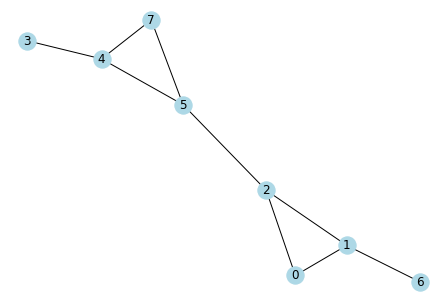

In [ ]:
D_unbiased = np.array([[-1,0.5,0.5,-1,-1,-1,-1,-1],[0.5,-1,0.5,-1,-1,-1,0.5,-1],[0.5,0.5,-1,-1,-1,0.5,-1,-1],[-1,-1,-1,-1,0.5,-1,-1,-1],[-1,-1,-1,0.5,-1,0.5,-1,0.5],[-1,-1,0.5,-1,0.5,-1,-1,0.5],[-1,0.5,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,0.5,0.5,-1,-1]])
D_same_biased = np.array([[-1,0.7,0.7,-1,-1,-1,-1,-1],[0.7,-1,0.7,-1,-1,-1,0.7,-1],[0.7,0.7,-1,-1,-1,0.7,-1,-1],[-1,-1,-1,-1,0.7,-1,-1,-1],[-1,-1,-1,0.7,-1,0.7,-1,0.7],[-1,-1,0.7,-1,0.7,-1,-1,0.7],[-1,0.7,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,0.7,0.7,-1,-1]])
D_different_biased = np.array([[-1,0.3,0.4,-1,-1,-1,-1,-1],[0.3,-1,0.7,-1,-1,-1,0.8,-1],[0.4,0.7,-1,-1,-1,0.2,-1,-1],[-1,-1,-1,-1,0.9,-1,-1,-1],[-1,-1,-1,0.9,-1,0.1,-1,0.5],[-1,-1,0.2,-1,0.1,-1,-1,0.3],[-1,0.8,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,0.5,0.3,-1,-1]])
show_graph_with_labels(D_unbiased)

**Περίπτωση 1**  *(0 corrupted χρήστες, δίκαια νομίσματα)*

In [ ]:
D1_ch_pre_prefinal = np.array([[0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625]])
D1_ch_prefinal = np.array([[0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125]])
D1_ch_final = np.array([[0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125], [0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125]])

print("Is D1_ch_prefinal refined by D1_ch_final?", refinement.refined_by(D1_ch_prefinal, D1_ch_final))
print("Is D1_ch_pre_prefinal refined by D1_ch_prefinal?", refinement.refined_by(D1_ch_pre_prefinal, D1_ch_prefinal))
factor(D1_ch_prefinal, D1_ch_final)

Is D1_ch_prefinal refined by D1_ch_final? True
Is D1_ch_pre_prefinal refined by D1_ch_prefinal? True
Is CR == C_new?  True


**Περίπτωση 2** *(2 corrupted χρήστες, δίκαια νομίσματα)*

In [ ]:
D2_ch_pre_prefinal = np.array([[0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0078125, 0.0, 0.0078125, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0078125, 0.0, 0.0, 0.0078125, 0.0, 0.0078125]])
D2_ch_prefinal = np.array([[0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0], [0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0], [0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0], [0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.00390625, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
D2_ch_final = np.array([[0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0], [0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0], [0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0], [0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125], [0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125], [0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.001953125]])

print("Is D2_ch_prefinal refined by D2_ch_final?", refinement.refined_by(D2_ch_prefinal, D2_ch_final))
print("Is D2_ch_pre_prefinal refined by D2_ch_prefinal?", refinement.refined_by(D2_ch_pre_prefinal, D2_ch_prefinal))
factor(D2_ch_prefinal, D2_ch_final)

Is D2_ch_prefinal refined by D2_ch_final? True
Is D2_ch_pre_prefinal refined by D2_ch_prefinal? True
Is CR == C_new?  True


**Περίπτωση 3** *(0 corrupted χρήστες, μη δίκαια νομίσματα όλα ίδια)*

In [ ]:
D3_ch_pre_prefinal = np.array([[0.08883699999999997, 0.05042099999999999, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05042099999999999, 0.08883699999999997, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05042099999999999, 0.05042099999999999, 0.08883699999999997, 0.006993000000000001, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.05042099999999999, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.003969000000000002, 0.003969000000000002, 0.006993000000000001, 0.08883699999999997, 0.038072999999999996, 0.016317, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.05042099999999999, 0.021609, 0.009261000000000002, 0.002997000000000001, 0.0, 0.009261000000000002, 0.021609, 0.038072999999999996, 0.0, 0.009261000000000002, 0.016316999999999998, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.038072999999999996, 0.021609, 0.0, 0.016316999999999998, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.003969000000000002, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.009261000000000002, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.016316999999999998, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.016317, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.009261000000000002, 0.009261000000000002, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.038072999999999996, 0.003969000000000002, 0.0, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.0, 0.021609, 0.05042099999999999, 0.021609, 0.003969000000000002, 0.0, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.05042099999999999, 0.021609, 0.006993000000000001, 0.0, 0.003969000000000002, 0.009261000000000002, 0.016316999999999998, 0.0, 0.021609, 0.038072999999999996, 0.0, 0.016317, 0.0, 0.0, 0.006993000000000001, 0.016316999999999998, 0.009261000000000002, 0.0, 0.038072999999999996, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.016317, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.002997000000000001, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016316999999999998, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.021609, 0.021609, 0.038072999999999996, 0.016317, 0.038072999999999996, 0.08883699999999997, 0.009261000000000002, 0.0, 0.021609, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.0, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.009261000000000002, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.009261000000000002, 0.021609, 0.05042099999999999, 0.016316999999999998, 0.0, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.0, 0.009261000000000002, 0.016317, 0.0, 0.038072999999999996, 0.0, 0.0, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.0, 0.016317, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.038072999999999996, 0.003969000000000002, 0.0, 0.0017010000000000011, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.0017010000000000011, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.021609, 0.003969000000000002, 0.0, 0.0017010000000000011, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.021609, 0.006993000000000001, 0.0, 0.002997000000000001, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.0, 0.016316999999999998, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.021609, 0.038072999999999996, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.08883699999999997, 0.0, 0.021609, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.0, 0.0017010000000000011, 0.003969000000000002, 0.009261000000000002, 0.05042099999999999, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.002997000000000001, 0.006993000000000001, 0.016316999999999998, 0.05042099999999999, 0.0, 0.016316999999999998, 0.006993000000000001, 0.003969000000000002, 0.0, 0.016317, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.009261000000000002, 0.003969000000000002, 0.006993000000000001, 0.0, 0.009261000000000002, 0.016317, 0.0, 0.038072999999999996, 0.0, 0.0, 0.003969000000000002, 0.038072999999999996, 0.0, 0.016317, 0.0, 0.0, 0.038072999999999996, 0.0, 0.0, 0.0, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.0, 0.021609, 0.0, 0.0, 0.003969000000000002, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.0, 0.0, 0.003969000000000002, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.006993000000000001, 0.021609, 0.0, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.016316999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009261000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08883699999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05042099999999999, 0.0, 0.0, 0.0, 0.0, 0.05042099999999999, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.0, 0.0, 0.0, 0.05042099999999999, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.021609, 0.038072999999999996, 0.0, 0.0, 0.0, 0.006993000000000001, 0.0, 0.0, 0.016317, 0.0, 0.038072999999999996, 0.021609, 0.0, 0.0, 0.038072999999999996, 0.0, 0.016317, 0.0017010000000000011, 0.0, 0.038072999999999996, 0.003969000000000002, 0.009261000000000002, 0.0, 0.0, 0.0, 0.003969000000000002, 0.0, 0.0, 0.009261000000000002, 0.0, 0.021609, 0.021609, 0.0, 0.0, 0.021609, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.009261000000000002, 0.0017010000000000011, 0.0, 0.021609, 0.003969000000000002, 0.009261000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.0, 0.0, 0.021609, 0.0, 0.009261000000000002, 0.002997000000000001, 0.0, 0.021609, 0.006993000000000001, 0.016316999999999998, 0.0, 0.009261000000000002, 0.016316999999999998, 0.006993000000000001, 0.016317, 0.0, 0.016316999999999998, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.0, 0.009261000000000002, 0.009261000000000002, 0.003969000000000002, 0.009261000000000002, 0.003969000000000002, 0.003969000000000002, 0.006993000000000001]])
D3_ch_prefinal = np.array([[0.062185899999999975, 0.03529469999999999, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0048951, 0.0020979000000000006, 0.0011907000000000007, 0.0011907000000000007], [0.03529469999999999, 0.062185899999999975, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0048951, 0.0020979000000000006, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0011907000000000007], [0.03529469999999999, 0.03529469999999999, 0.062185899999999975, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.03529469999999999, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0048951, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.0027783000000000013, 0.0027783000000000013, 0.0048951, 0.062185899999999975, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0027783000000000013, 0.03529469999999999, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.03529469999999999, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.03529469999999999, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0011907000000000007, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.0020979000000000006, 0.0114219, 0.006482700000000001, 0.0114219, 0.004895100000000001, 0.0020979000000000006, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0048951], [0.006482700000000001, 0.006482700000000001, 0.0114219, 0.026651099999999997, 0.062185899999999975, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.015126299999999999, 0.03529469999999999, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.015126299999999999, 0.026651099999999997, 0.002778300000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0048951, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0027783000000000013, 0.004895100000000001, 0.0005103000000000004, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.002778300000000001, 0.0005103000000000004, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.0048951, 0.002778300000000001, 0.0008991000000000004, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.0048951, 0.002778300000000001, 0.0048951, 0.0020979000000000006, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.0011907000000000007, 0.002778300000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.015126299999999999, 0.015126299999999999, 0.026651099999999997, 0.0114219, 0.026651099999999997, 0.062185899999999975, 0.006482700000000001, 0.0114219, 0.015126299999999999, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.015126299999999999, 0.03529469999999999, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.026651099999999997, 0.002778300000000001, 0.004895100000000001, 0.011421899999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.015126299999999999, 0.004895100000000001, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.004895100000000001, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.026651099999999997, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.0011907000000000007, 0.015126299999999999, 0.0027783000000000013, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.002778300000000001, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.0020979000000000006, 0.011421899999999999, 0.0011907000000000007, 0.0020979000000000006, 0.0048951, 0.0114219, 0.006482700000000001, 0.0020979000000000006, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0005103000000000004, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0005103000000000004, 0.0005103000000000004, 0.0008991000000000004], [0.015126299999999999, 0.026651099999999997, 0.015126299999999999, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.062185899999999975, 0.0011907000000000007, 0.015126299999999999, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.03529469999999999, 0.0011907000000000007, 0.0011907000000000007, 0.0027783000000000013, 0.006482700000000001, 0.03529469999999999, 0.0011907000000000007, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0020979000000000006, 0.0048951, 0.011421899999999999, 0.03529469999999999, 0.0020979000000000006, 0.011421899999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.015126299999999999, 0.004895100000000001, 0.002778300000000001, 0.006482700000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.026651099999999997, 0.002778300000000001, 0.004895100000000001, 0.0027783000000000013, 0.026651099999999997, 0.0005103000000000004, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.002778300000000001, 0.026651099999999997, 0.0114219, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.015126299999999999, 0.0005103000000000004, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.0027783000000000013, 0.015126299999999999, 0.0005103000000000004, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.0048951, 0.015126299999999999, 0.0008991000000000004, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0011907000000000007, 0.0020979000000000006, 0.0048951, 0.0114219, 0.004895100000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.006482700000000001, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001], [0.002778300000000001, 0.002778300000000001, 0.004895100000000001, 0.0114219, 0.026651099999999997, 0.0114219, 0.0011907000000000007, 0.062185899999999975, 0.002778300000000001, 0.006482700000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.03529469999999999, 0.006482700000000001, 0.015126299999999999, 0.006482700000000001, 0.0011907000000000007, 0.03529469999999999, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.006482700000000001, 0.015126299999999999, 0.006482700000000001, 0.0020979000000000006, 0.03529469999999999, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.004895100000000001, 0.015126299999999999, 0.026651099999999997, 0.0020979000000000006, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.002778300000000001, 0.026651099999999997, 0.015126299999999999, 0.004895100000000001, 0.0005103000000000004, 0.026651099999999997, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.0005103000000000004, 0.015126299999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.002778300000000001, 0.0005103000000000004, 0.015126299999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.002778300000000001, 0.0008991000000000004, 0.015126299999999999, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.011421899999999999, 0.0020979000000000006, 0.006482700000000001, 0.011421899999999999, 0.0048951, 0.0114219, 0.0011907000000000007, 0.011421899999999999, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.0027783000000000013, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.0027783000000000013, 0.0027783000000000013, 0.0048951]])
D3_ch_final = np.array([[0.04695669999999998, 0.026651099999999994, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0048951, 0.004895100000000001, 0.002778300000000001, 0.002778300000000001], [0.026651099999999994, 0.04695669999999998, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0048951, 0.004895100000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001], [0.026651099999999994, 0.026651099999999994, 0.04695669999999998, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.026651099999999994, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0048951, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.004895100000000001], [0.0027783000000000013, 0.0027783000000000013, 0.0048951, 0.04695669999999998, 0.020124299999999994, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0027783000000000013, 0.026651099999999994, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.026651099999999994, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.026651099999999994, 0.011421899999999999, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0011907000000000007, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.0020979000000000006, 0.0114219, 0.006482700000000001, 0.0114219, 0.0114219, 0.004895100000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.0048951], [0.006482700000000001, 0.006482700000000001, 0.0114219, 0.020124299999999994, 0.04695669999999998, 0.026651099999999997, 0.0027783000000000013, 0.026651099999999997, 0.006482700000000001, 0.011421899999999999, 0.026651099999999994, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.011421899999999999, 0.026651099999999994, 0.015126299999999999, 0.0027783000000000013, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.0048951, 0.002778300000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.026651099999999994, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.008624699999999999, 0.002778300000000001, 0.011421899999999999, 0.020124299999999994, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0048951, 0.008624699999999999, 0.0048951, 0.004895100000000001, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.0011907000000000007, 0.0114219, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0048951, 0.026651099999999997, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.0048951, 0.0048951, 0.002778300000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.008624699999999999, 0.015126299999999999, 0.004895100000000001, 0.0048951, 0.0048951, 0.002778300000000001, 0.0048951, 0.004895100000000001, 0.0114219, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.011421899999999999, 0.011421899999999999, 0.020124299999999994, 0.0114219, 0.026651099999999997, 0.04695669999999998, 0.0048951, 0.026651099999999997, 0.011421899999999999, 0.006482700000000001, 0.015126299999999999, 0.026651099999999994, 0.0048951, 0.015126299999999999, 0.006482700000000001, 0.015126299999999999, 0.026651099999999994, 0.0048951, 0.015126299999999999, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.026651099999999994, 0.008624699999999999, 0.015126299999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.006482700000000001, 0.0114219, 0.008624699999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.011421899999999999, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.002097900000000001, 0.0114219, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.0027783000000000013, 0.026651099999999997, 0.002778300000000001, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.011421899999999999, 0.002097900000000001, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.0027783000000000013, 0.015126299999999999, 0.002778300000000001, 0.002778300000000001, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.011421899999999999, 0.0036963, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.004895100000000001, 0.008624699999999999, 0.002778300000000001, 0.004895100000000001, 0.0048951, 0.0114219, 0.0048951, 0.004895100000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0011907000000000007, 0.0011907000000000007, 0.0020979000000000006], [0.011421899999999999, 0.020124299999999994, 0.011421899999999999, 0.0011907000000000007, 0.0027783000000000013, 0.0048951, 0.04695669999999998, 0.002778300000000001, 0.011421899999999999, 0.0011907000000000007, 0.0027783000000000013, 0.0048951, 0.026651099999999994, 0.002778300000000001, 0.0011907000000000007, 0.0027783000000000013, 0.0048951, 0.026651099999999994, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.008624699999999999, 0.026651099999999994, 0.004895100000000001, 0.008624699999999999, 0.0048951, 0.0027783000000000013, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.011421899999999999, 0.0114219, 0.006482700000000001, 0.0048951, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.006482700000000001, 0.0114219, 0.002097900000000001, 0.020124299999999994, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.0114219, 0.026651099999999997, 0.002778300000000001, 0.026651099999999997, 0.026651099999999997, 0.0048951, 0.0027783000000000013, 0.0027783000000000013, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.006482700000000001, 0.006482700000000001, 0.002097900000000001, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.002097900000000001, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.006482700000000001, 0.015126299999999999, 0.002778300000000001, 0.015126299999999999, 0.015126299999999999, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.0036963, 0.011421899999999999, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.006482700000000001, 0.015126299999999999, 0.0048951, 0.015126299999999999, 0.015126299999999999, 0.0048951, 0.004895100000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.008624699999999999, 0.002778300000000001, 0.004895100000000001, 0.0048951, 0.0114219, 0.0114219, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001], [0.006482700000000001, 0.006482700000000001, 0.0114219, 0.0114219, 0.026651099999999997, 0.026651099999999997, 0.002778300000000001, 0.04695669999999998, 0.006482700000000001, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.026651099999999994, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.002778300000000001, 0.026651099999999994, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.015126299999999999, 0.015126299999999999, 0.004895100000000001, 0.026651099999999994, 0.002778300000000001, 0.002778300000000001, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.0114219, 0.011421899999999999, 0.020124299999999994, 0.004895100000000001, 0.0048951, 0.002778300000000001, 0.0048951, 0.0114219, 0.006482700000000001, 0.0114219, 0.006482700000000001, 0.020124299999999994, 0.011421899999999999, 0.0114219, 0.0011907000000000007, 0.020124299999999994, 0.0011907000000000007, 0.0114219, 0.0011907000000000007, 0.002778300000000001, 0.026651099999999997, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.002778300000000001, 0.002778300000000001, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.006482700000000001, 0.011421899999999999, 0.011421899999999999, 0.006482700000000001, 0.0011907000000000007, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.006482700000000001, 0.0011907000000000007, 0.011421899999999999, 0.0011907000000000007, 0.006482700000000001, 0.0011907000000000007, 0.002778300000000001, 0.015126299999999999, 0.0027783000000000013, 0.0048951, 0.002778300000000001, 0.0048951, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.006482700000000001, 0.0020979000000000006, 0.011421899999999999, 0.0020979000000000006, 0.006482700000000001, 0.0020979000000000006, 0.0048951, 0.015126299999999999, 0.0048951, 0.008624699999999999, 0.004895100000000001, 0.0048951, 0.008624699999999999, 0.0048951, 0.0114219, 0.002778300000000001, 0.008624699999999999, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.002097900000000001, 0.002778300000000001, 0.0048951, 0.0048951, 0.0027783000000000013, 0.006482700000000001, 0.002097900000000001, 0.002097900000000001, 0.0036963]])

print("Is D3_ch_prefinal refined by D3_ch_final?", refinement.refined_by(D3_ch_prefinal, D3_ch_final))
print("Is D3_ch_pre_prefinal refined by D3_ch_prefinal?", refinement.refined_by(D3_ch_pre_prefinal, D3_ch_prefinal))
factor(D3_ch_prefinal, D3_ch_final)

Is D3_ch_prefinal refined by D3_ch_final? True
Is D3_ch_pre_prefinal refined by D3_ch_prefinal? True


Και στις τρεις περιπτώσεις χρησιμοποιούμε τη μέθοδο refined_by δύο φορές. Την πρώτη για να ελέγξουμε αν το κανάλι με 8 ακμές είναι πιο ασφαλές από αυτό με τις 7, και τη δεύτερη για να ελέγξουμε αν το τελικό κανάλι με τις 9 ακμές είναι πιο ασφαλές από αυτό με τις 8. Και στους δύο ελέγχους το αποτέλεσμα είναι true, που σημαίνει ότι όταν σε έναν γράφο προστίθενται ακμές, το σύστημα είναι πιθανόν να είναι ασφαλέστερο. Σίγουρα όμως παραμένει **τουλάχιστον τόσο ασφαλές** όσο ήταν και το προηγούμενο. Τέλος, εξετάζεται αν το κανάλι $C^{n+1}$ είναι post processing του $C^{n}$ για κάποιο κανάλι $R$. Το αποτέλεσμα είναι θετικό!

Η απάντηση που δόθηκε στο ερώτημα αυτό μπορεί να χρησιμοποιηθεί για την ανάλυση του δευτέρου ερωτήματος. Πιο συγκεκριμένα, στο δεύτερο ερώτημα χρησιμοποιήθηκε η σχέση $\mathcal{M L}_{g}(C^{n+1}) \leq \mathcal{M L}_{g}(C^{n}) $ για τη χωρητικότητα.